# ABoVE: Soil Active Layer Thaw Depths at CRREL sites near Fairbanks, Alaska, 2014-2018

### See the manual for this data here: https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1701

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from datetime import datetime

%matplotlib inline

In [71]:
df = pd.read_csv(r'C:\Users\emack\Documents\AboveSoil\Active_Layer_Thaw_Depths_1701\Active_Layer_Thaw_Depths_1701\data\Thaw_depth_four_sites_near_fairbanks.csv')

In [72]:
df.head()

,year,site,northing,easting,latitude,longitude,thaw_depth,type
0,2014,Creamer's Field,7193915.5,465013.5,64.867711,-147.738285,67.0,Mixed Forest
1,2014,Creamer's Field,7193918.9,465011.7,64.867742,-147.738323,70.0,Mixed Forest
2,2014,Creamer's Field,7193923.3,465011.4,64.867781,-147.738331,67.0,Mixed Forest
3,2014,Creamer's Field,7193927.2,465011.5,64.867816,-147.738330,72.0,Mixed Forest
4,2014,Creamer's Field,7193930.7,465010.8,64.867847,-147.738345,76.0,Mixed Forest


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 8 columns):
year          2270 non-null int64
site          2270 non-null object
northing      2270 non-null float64
easting       2270 non-null float64
latitude      2270 non-null float64
longitude     2270 non-null float64
thaw_depth    2257 non-null float64
type          2270 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 142.0+ KB


# Convert 'year' to data time format.

In [88]:
count = 0
for date in df['year']:
    count += 1
     
    
count

2270

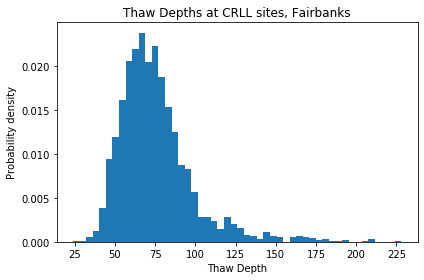

In [75]:


# example data

x =df['thaw_depth']

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = df['year']
ax.set_xlabel('Thaw Depth')
ax.set_ylabel('Probability density')
ax.set_title(r'Thaw Depths at CRLL sites, Fairbanks')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [78]:
output = "{}'s favorite number is {} and her favorite color is {}".format("Kylie", 8, 'red')
print(output)                                                                      

Kylie's favorite number is 8 and her favorite color is red
